## Exploratory data analysis/Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score)
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,ID,Policy Start Date,Policy End Date,Revenue,Feature 1,Feature 2,Feature 3
0,2457,2020-10-01,2021-06-01,156.710314,1.0,0.0,0.649264
1,2458,2021-07-01,2021-11-01,190.236838,1.0,0.0,0.119590
2,2459,2020-01-01,2021-06-01,183.123384,0.0,0.0,0.749034
3,2460,2021-09-01,2021-09-01,24.626305,0.0,1.0,0.498292
4,2461,2021-10-01,2021-10-01,30.184129,1.0,1.0,0.865428


In [4]:
df.dtypes

ID                     int64
Policy Start Date     object
Policy End Date       object
Revenue              float64
Feature 1            float64
Feature 2            float64
Feature 3            float64
dtype: object

In [5]:
# cast policy start/end date to datetime
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy End Date'] = pd.to_datetime(df['Policy End Date'])

In [6]:
df.describe()

,ID,Revenue,Feature 1,Feature 2,Feature 3
count,65412.000000,6.541200e+04,65412.000000,62705.000000,65412.000000
mean,34892.801367,1.546202e+04,0.441723,0.231305,0.500645
std,18757.092150,3.918424e+06,0.496596,0.421670,0.288954
min,2457.000000,2.371205e+01,0.000000,0.000000,0.000018
25%,18647.750000,9.197089e+01,0.000000,0.000000,0.250374
50%,34860.500000,1.253995e+02,0.000000,0.000000,0.500473
75%,51121.250000,1.902368e+02,1.000000,0.000000,0.750428
max,67583.000000,1.002167e+09,1.000000,1.000000,0.999997


In [7]:
# check for duplicates
search = pd.DataFrame.duplicated(df)
print(search[search == True])

Series([], dtype: bool)


In [8]:
# check for missing
df.isnull().sum()

ID                      0
Policy Start Date       0
Policy End Date         0
Revenue                 0
Feature 1               0
Feature 2            2707
Feature 3               0
dtype: int64

In [9]:
df['Feature 2'].unique()

array([ 0.,  1., nan])

In [10]:
# replacing nulls with median
df['Feature 2'] = df['Feature 2'].fillna(df['Feature 2'].median())

In [11]:
pd.set_option('display.max_rows', None)
print(df['Feature 2'][df['Feature 2'].isnull()])

Series([], Name: Feature 2, dtype: float64)


0.0    36518
1.0    28894
Name: Feature 1, dtype: int64


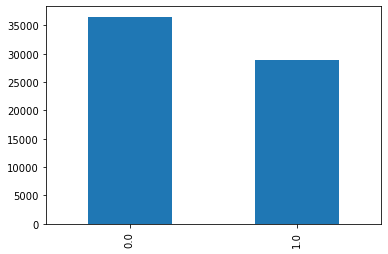

In [12]:
# Value counts in ['Feature 1 ''] column
color_wheel = {1: '#0392cf', 2: '#7bc043'}
colors = df['Feature 1'].map(lambda x: color_wheel.get(x + 1))
print(df['Feature 1'].value_counts())
p=df['Feature 1'].value_counts().plot(kind='bar')

0.0    50908
1.0    14504
Name: Feature 2, dtype: int64


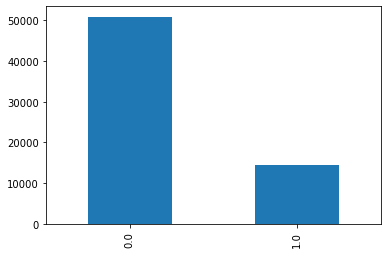

In [13]:
# Value counts in [‘Feature 2’] column
color_wheel = {1: '#0392cf', 2: '#7bc043'}
colors = df['Feature 2'].map(lambda x: color_wheel.get(x + 1))
print(df['Feature 2'].value_counts())
p=df['Feature 2'].value_counts().plot(kind='bar')

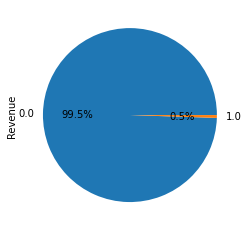

In [14]:
# check revenue distribution by Feature 1
df1 = df.groupby(['Feature 1']).agg(Revenue = ('Revenue', 'sum'))
df1['Revenue']=df1['Revenue'].astype(int)
plot = df1['Revenue'].plot.pie(autopct='%1.1f%%')

99.5% of revenue is generated by records tagged as 0

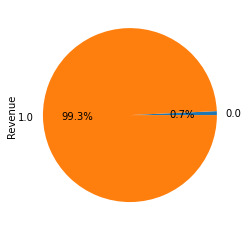

In [15]:
# check revenue distribution by Feature 2
df2 = df.groupby(['Feature 2']).agg(Revenue = ('Revenue', 'sum'))
df2['Revenue']=df2['Revenue'].astype(int)
plot2 = df2['Revenue'].plot.pie(autopct='%1.1f%%')

99.3% of revenue is generated by records tagged as 1

In [16]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,ID,Revenue,Feature 1,Feature 2,Feature 3
count,65412.00,65412.00,65412.00,65412.00,65412.00
mean,34892.80,15462.02,0.44,0.22,0.50
std,18757.09,3918424.49,0.50,0.42,0.29
min,2457.00,23.71,0.00,0.00,0.00
25%,18647.75,91.97,0.00,0.00,0.25
50%,34860.50,125.40,0.00,0.00,0.50
75%,51121.25,190.24,1.00,0.00,0.75
max,67583.00,1002167367.00,1.00,1.00,1.00


Revenue has a major outlier of $1T

In [17]:
# identiftying index for outlier in Revenue feature
df[df['Revenue']==1002167367.00]

,ID,Policy Start Date,Policy End Date,Revenue,Feature 1,Feature 2,Feature 3
65411,67583,2021-08-01,2021-11-01,1002167367.00,0.00,1.00,0.43


In [18]:
# dropped record that was an outlier
df.drop([65411], axis=0, inplace=True)

In [19]:
df.describe()

,ID,Revenue,Feature 1,Feature 2,Feature 3
count,65411.00,65411.00,65411.00,65411.00,65411.00
mean,34892.30,141.17,0.44,0.22,0.50
std,18756.80,75.23,0.50,0.42,0.29
min,2457.00,23.71,0.00,0.00,0.00
25%,18647.50,91.97,0.00,0.00,0.25
50%,34860.00,125.40,0.00,0.00,0.50
75%,51120.50,190.24,1.00,0.00,0.75
max,67450.00,363.56,1.00,1.00,1.00


# Questions:

## 1. a) Calculate Revenue: All 2021 policies (2021 Policy Start Date regardless of their end date)

In [20]:
df['start_year'] = df['Policy Start Date'].dt.year 
# added year feature variable because policy start date would start at end of year when agg
#df.head()
Revenue_2021 = df[df['start_year']==2021]['Revenue'].sum()
result = f'${Revenue_2021:,.2f}' # formatting to currency
print('All 2021 policies total revenue:', result)

All 2021 policies total revenue: $3,354,956.91


## 1. b) Calculate Revenue: 2021 policies by Policy Start Date

In [21]:
#pd.options.display.float_format = '${:,.2f}'.format
df1 = df[df['start_year']==2021]
DailyRev_2021 = df1.groupby('Policy Start Date')['Revenue'].sum()
print(DailyRev_2021)

Policy Start Date
2021-01-01    220631.42
2021-02-01    204905.39
2021-03-01    210473.60
2021-04-01    206700.90
2021-05-01     51406.66
2021-06-01     28644.42
2021-07-01   1618059.83
2021-08-01    225666.50
2021-09-01    213136.31
2021-10-01    214370.33
2021-11-01    160961.55
Name: Revenue, dtype: float64


## 2. Calculate the First Year Renewal % of all policies that have a start date of 2020-07-01

In [22]:
total_policies = df[df['Policy Start Date']=='2020-7-1'].value_counts().sum()
total_renewals = df[(df['Policy Start Date']=='2020-7-1')]
total_renewals = total_renewals[(total_renewals['Policy End Date']>='2021-7-1')].value_counts().sum()
policy_renewal = total_renewals/total_policies*100
result = f'{policy_renewal:,.2f}%' # formatting to percentage
print('First year renwal of policies that have a start date 2020-07-01:', result)

First year renwal of policies that have a start date 2020-07-01: 52.97%


## 3. Describe in words what type of model would be appropriate to predict first year renewal? Explain the reason behind the model choice.

A regression model would work here. From the data the start date and end date of a policy is provided. From there you'd be able to get a number of days the policy has been active. This feature would be a continuous variable and stationary which allows works for a regression model.

## 4. Assume that all policies with Policy End Date as November 2021 are active and the payments after November 2021 are unobserved. What type of statistical or machine learning modeling technique(s) would you use to build a predictive model of customer retention?

This is classification problem and any sort of classification model would work. For example, logistic regression, SVM, a decision tree, or a random forest.

## 5. Assume that all policies with Policy End Date as November 2021 are active and the payments after November 2021 are unobserved. Predict the policy end date for all active policies.

I'll subset the dataset to include only policies ending in November 2021. To create the target feature, I will take the difference between the policy start and end dates to get the length in days. This will end up becoming the target feature.

Another feature added to the dataset is an active policy dummy. Records that are less than 365 in the ActivePolicyDays feature are 0, while records that are greater than 365 are 1.

### EDA/Pre-processing

In [23]:
# creating a new dataset for policies ending nov 2021
df = df[df['Policy End Date']=='2021-11-01']

In [24]:
# creating active policy days feature that is the difference between the policy end and start date
# this will end up becoming the target feature
df['ActivePolicyDays'] = (df['Policy End Date'] - df['Policy Start Date']).dt.days

In [25]:
# creating active policy days dummy; records that are <365 are 0; 365+ are 1 
df['APD_dummy'] = np.where(df['ActivePolicyDays']>= 365, 1, 0)

In [26]:
df.describe()

,ID,Revenue,Feature 1,Feature 2,Feature 3,start_year,ActivePolicyDays,APD_dummy
count,32995.00,32995.00,32995.00,32995.00,32995.00,32995.00,32995.00,32995.00
mean,34962.76,177.08,0.47,0.22,0.50,2020.48,308.08,0.38
std,18733.51,62.53,0.50,0.41,0.29,0.73,267.09,0.49
min,2458.00,24.63,0.00,0.00,0.00,2019.00,-10896.00,0.00
25%,18778.50,123.53,0.00,0.00,0.25,2020.00,123.00,0.00
50%,34866.00,164.94,0.00,0.00,0.50,2021.00,184.00,0.00
75%,51251.00,227.68,1.00,0.00,0.75,2021.00,488.00,1.00
max,67450.00,363.56,1.00,1.00,1.00,2051.00,854.00,1.00


ActivePolicyDays (APD) has a minimum of -10896.00 days due to a policy having a start year of 2051. To treat this record, I'm going to remove it from the dataset.

In [27]:
# major outlier in active days, theres a policy start date from 2051
# identifying index
df[df['ActivePolicyDays'] < 0]

,ID,Policy Start Date,Policy End Date,Revenue,Feature 1,Feature 2,Feature 3,start_year,ActivePolicyDays,APD_dummy
65410,67450,2051-09-01,2021-11-01,121.00,1.00,1.00,0.43,2051,-10896,0


In [28]:
# dropped record that was an outlier
df.drop([65410], axis=0, inplace=True)

<AxesSubplot:>

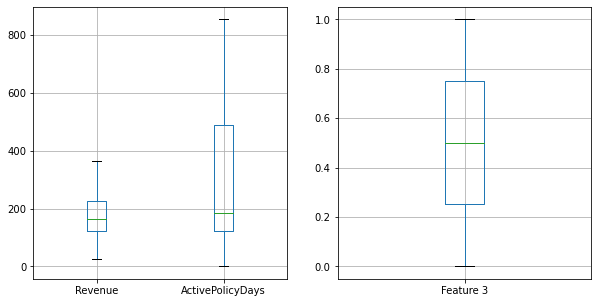

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df.boxplot(column=['Revenue', 'ActivePolicyDays'], ax=ax[0])
df.boxplot(column='Feature 3', ax=ax[1])

In [30]:
df.describe()

,ID,Revenue,Feature 1,Feature 2,Feature 3,start_year,ActivePolicyDays,APD_dummy
count,32994.00,32994.00,32994.00,32994.00,32994.00,32994.00,32994.00,32994.00
mean,34961.77,177.09,0.47,0.22,0.50,2020.47,308.41,0.38
std,18732.94,62.53,0.50,0.41,0.29,0.71,259.87,0.49
min,2458.00,24.63,0.00,0.00,0.00,2019.00,0.00,0.00
25%,18777.75,123.53,0.00,0.00,0.25,2020.00,123.00,0.00
50%,34865.00,164.94,0.00,0.00,0.50,2021.00,184.00,0.00
75%,51247.75,227.68,1.00,0.00,0.75,2021.00,488.00,1.00
max,67449.00,363.56,1.00,1.00,1.00,2021.00,854.00,1.00


Now that the outlier is dropped, Revenue and Feature 3 look normally distributed while APD is skewed to the right. 
The APD might be overestimated, possibly there are more policies that have a shorter term as opposed to a longer term. 
This can be substantiated by the descriptive table above where the mean of APD is less than a year which might imply there are more short-term policies in the dataset. Also, the minimum start year is 2019 which is only 2 year spread from the max year in the dataset.

Text(0.5, 1.0, 'Scatter')

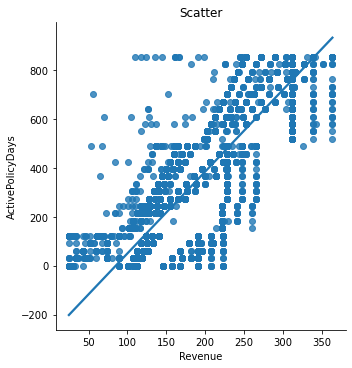

In [31]:
sns.lmplot(x='Revenue', y='ActivePolicyDays', data=df )
plt.title('Scatter')

The relationship between Revenue and APD is clear, a positive linear relationship. If there is an increase in APD then there will be an increase in Revenue.

<AxesSubplot:xlabel='Revenue', ylabel='Count'>

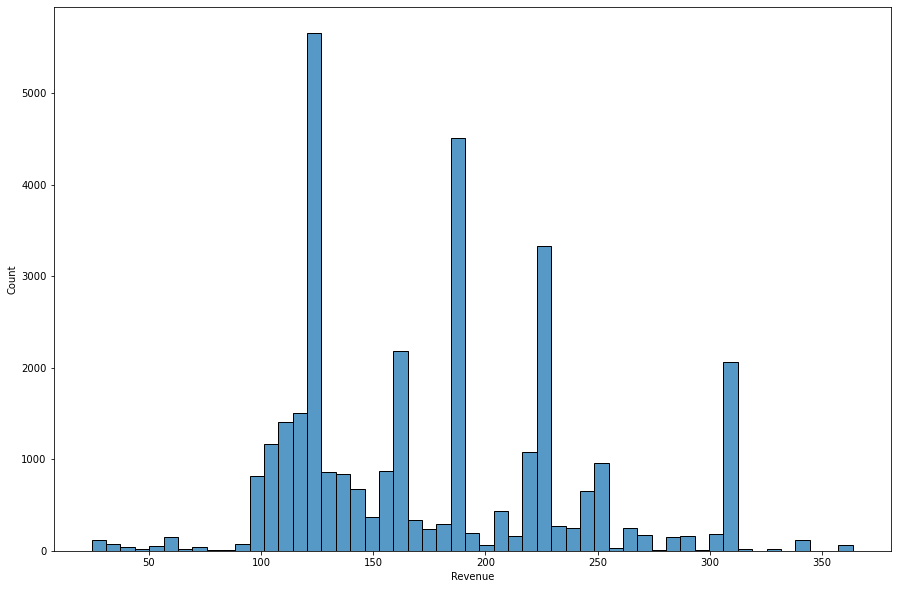

In [32]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.histplot(df['Revenue'])

Looking at the distribution of Revenue, there are large peaks of policies that generate a revenue at bins 135, 185, 225, and 315.

### Splitting the dataset
A training and test set is created. 70% (23k records) of the data is kept as training  while the remaining 30% (10k records) serves as the testing set. I kept the shuffling controlled for reproducibility.

In [33]:
y = df['ActivePolicyDays']
features = ['Revenue',
'Feature 3',
'Feature 1',
'Feature 2',
'APD_dummy']
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=312)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(23095, 5) (9899, 5)
(23095,) (9899,)


### Training the model
The instance regression is initialized and X,y training set is fitted into a linear model.

From the output below the linear model is as follows:

ActivePolicyDays = -207.265+ (2.770 * Revenue) + (-4.764* Feature 3) + (-159.556 * Feature 1) + (19.413 * Feature 2) + + (256.087 * APD_dummy) + e

The slope of the model is -207.265, which means if dummy Features 1 and 2 remain 0 then the APDs goes down by 207 days. If Features 1 and 2 is reported 1 then the APD decrease is only 159 days for Feature 1 while Feature 2 increases APDs by 19 days. A single APD increase, increases Revenue by $2.77. A single APD increase, decreases Feature 3 by 4.76. 

The APD dummy can be interpreted a bit differently. Since this feature was created to see if a policy ended within a year or more than a year. In this case if a policy ends within 365 days an APD would decrease 207 days, implying this could be a short-term policy. If the policy ends after 365 days the APDs can increase 256 days, implying that after the first year a policy may not complete a full second year.

In [34]:
regression = LinearRegression(normalize=True)
regression.fit(X_train,y_train)
#regression.fit(X_test,y_test)

print(f'Intercept: {regression.intercept_:.3f}')

print('Coefficients:')
for name, coef in zip(features, regression.coef_):
    print(f' {name}: {coef}')
    
y_pred = regression.predict(X_train)

Intercept: -207.265
Coefficients:
 Revenue: 2.7701329128154755
 Feature 3: -4.763909861709744
 Feature 1: -159.55609617209666
 Feature 2: 19.412758237167317
 APD_dummy: 256.08660540998784


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [35]:
meanAbErr = mean_absolute_error(y_train, y_pred)
meanSqErr = mean_squared_error(y_train, y_pred)
rootMeanSqErr = np.sqrt(mean_squared_error(y_train, y_pred))
print('R squared: {:.2f}'.format(regression.score(X_train,y_train)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 90.11
Mean Absolute Error: 61.454758209726386
Mean Square Error: 6625.742913903035
Root Mean Square Error: 81.39866653639379


In [36]:
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df_train.head()

,Actual,Predicted
19325,579,622.87
20583,0,51.42
54350,123,151.53
14710,273,263.06
15555,123,130.24


### Prediction on the test set/Model Evaluation
The r-square indicates that 90.36% of the data fit on the regression line and is only slightly better than the training model. The model's accuracy estimates, the mean absolute error, for the training and test model is roughly the same at 61. On average the forecast's distance from the true value is 61 which isn't such a high error. The average squared error for the prediction is 6,629 which can be used as a baseline to see if model accuracy improves over time or not. Overall, given the size of the test set of almost 10k records the evaluation metrics show a pretty strong model.

In [37]:
y_pred = regression.predict(X_test)

In [38]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test.head()

,Actual,Predicted
3822,61,99.44
9009,123,133.59
29801,123,152.76
33299,92,118.69
61882,123,153.45


In [39]:
meanAbErr = mean_absolute_error(y_test, y_pred)
meanSqErr = mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(regression.score(X_test,y_test)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 90.36
Mean Absolute Error: 61.52741676108582
Mean Square Error: 6629.565201371646
Root Mean Square Error: 81.42214196010595


### Combining predicted values to dataset

In [40]:
df1=pd.concat([df_train, df_test], axis=0)

In [41]:
df1 = df1.drop(['Actual'], axis=1)

In [42]:
df = df.join(df1)

In [43]:
df.head()

,ID,Policy Start Date,Policy End Date,Revenue,Feature 1,Feature 2,Feature 3,start_year,ActivePolicyDays,APD_dummy,Predicted
1,2458,2021-07-01,2021-11-01,190.24,1.00,0.00,0.12,2021,123,0,159.59
6,2463,2021-02-01,2021-11-01,128.21,0.00,0.00,0.13,2021,273,0,147.28
7,2464,2019-07-01,2021-11-01,311.88,1.00,0.00,0.51,2019,854,1,750.76
9,2466,2020-01-01,2021-11-01,222.67,0.00,1.00,0.77,2020,670,1,681.37
10,2467,2020-09-01,2021-11-01,154.45,0.00,0.00,0.55,2020,426,1,474.03


In [44]:
df['Pred_PolicyEndDate'] = df['Policy End Date'] + pd.to_timedelta(df['Predicted'], unit = 'D')
df['Pred_PolicyEndDate'] = pd.to_datetime(df['Pred_PolicyEndDate']).dt.normalize()

In [45]:
s = df['Pred_PolicyEndDate'].value_counts().sort_index()

<AxesSubplot:>

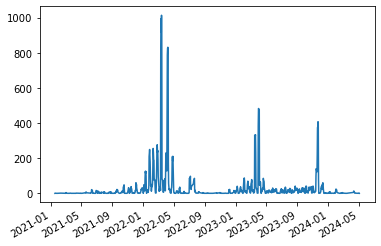

In [46]:
s.plot()

From the chart above, about 1k of the policies that have a Policy End Date of November 2021 will end mid-2022. In 2023, 500 policies with a November 2021 Policy End Date will be in the middle of the year as well. However, in 2024 there's a jump of 400 November 2021 Policy End Dates that will end at the end of 2023.

In [47]:
df2 = (df['Pred_PolicyEndDate']
                       .value_counts()
                       .sort_index()
                       .rename_axis('date')
                       .reset_index(name='count'))

In [48]:
print(df2.groupby([df2['date'].dt.year.rename('year'), 
                   df2['date'].dt.month_name().rename('month')])
         ['count'].sum().reset_index())

    year      month  count
0   2021      April      8
1   2021     August     90
2   2021   December    484
3   2021   February      7
4   2021    January      5
5   2021       July    138
6   2021       June    132
7   2021      March     15
8   2021        May     33
9   2021   November    296
10  2021    October    260
11  2021  September    153
12  2022      April   6037
13  2022     August     53
14  2022   December    170
15  2022   February   3131
16  2022    January   2199
17  2022       July    980
18  2022       June     51
19  2022      March   6055
20  2022        May    263
21  2022   November     19
22  2022    October     17
23  2022  September     15
24  2023      April   2706
25  2023     August    515
26  2023   December    432
27  2023   February    850
28  2023    January    347
29  2023       July    405
30  2023       June    282
31  2023      March   2443
32  2023        May    345
33  2023   November   2722
34  2023    October    582
35  2023  September    484
3